<a href="https://colab.research.google.com/github/hantedyou/kccnlpClass/blob/main/predition_old_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading modules

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.7 MB 13.6 MB/s 
     |████████████████████████████████| 596 kB 72.4 MB/s 
     |████████████████████████████████| 6.6 MB 55.3 MB/s 
     |████████████████████████████████| 101 kB 6.9 MB/s 


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#-----------

In [ ]:
!nvidia-smi

Thu Jul 28 01:43:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os, sys
from google.colab import drive

ROOT = '/content/drive'     # default for the drive
drive.mount(ROOT)

Mounted at /content/drive


In [ ]:
PROJ = 'My Drive/kcc/KCCNLP2022_shared'       # path to your project on Drive
           
PROJECT_PATH = os.path.join(ROOT, PROJ)  
print(PROJECT_PATH)
os.chdir(PROJECT_PATH)
os.listdir()[:10]

/content/drive/My Drive/kcc/KCCNLP2022_shared


['model',
 'data',
 'result',
 'predition.ipynb',
 'ReadMe.gsheet',
 'KCC NLP 20220712.gslides',
 'DATA_EDA_2022',
 'tmp',
 'TrainModelRoberta.ipynb',
 'ipynb保留執行結果']

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!pip install wandb
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 11.5 MB/s 
     |████████████████████████████████| 181 kB 49.7 MB/s 
     |████████████████████████████████| 153 kB 70.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=dff61e45053839741bac338a6e9216644f16e21b3e680a10798568a66cd16bc8
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
wandb.init()

In [ ]:
df_old = pd.read_csv('data/2020CisDep-10501-類別轉換.csv',index_col = 0)
print(df_old.columns)
#df_old = df_old[['編號', '類別', '分類', '內容']]
df_old.head()

Index(['編號', '類別', '分類', '內容', '舊分類'], dtype='object')


,編號,類別,分類,內容,舊分類
0,1,新聞,20,壽山動物園為增進動物飼養福祉及保育工作，特設立「高雄市壽山動物園認養辦法」設立動物認養專戶，...,26
1,2,新聞,10,高雄翻轉須新政府全面力挺高雄市長陳菊日前在市議會做施政報告時指出，翻轉產業高雄的使命責任，面...,61
2,3,新聞,1,台塑企業回饋地方藝文活動，週六晚間在高雄市仁武區運動公園登場，明華園歌仔戲團演出逐鹿中原戲碼...,18
3,4,新聞,3,也談赦扁暗公鳥近來特赦阿扁呼聲不斷，台南與高雄市議會及醫界相繼呼籲馬英九特赦陳水扁。馬是繫鈴...,10
4,5,新聞,4,高雄道德院在甲仙區有占地三十甲甲仙道場，每季高雄道德院住持三清太乙大宗師翁太明會率出家眾及信...,52


In [ ]:
print(len(df_old))
# 移除分類是NAN的資料
df_old=df_old.dropna(subset=['分類'])
print(len(df_old))
df_old['分類'] = df_old['分類'].astype('int64')

10144
10144


# 移除跟data_3000重複的資料

In [ ]:
path_data3k = r"data/data_3000.csv"
df_data3k = pd.read_csv(path_data3k)
df_data3k.columns

Index(['資料類別', '編號', 'content', 'Unit', '修正後區域標記', '修正後情緒標記', 'subject1',
       'subject2', 'subject3', 'subject4', 'subject5', 'reCheckedEmotion',
       'reCheckedsubject'],
      dtype='object')

In [ ]:
val_number = df_data3k['編號']

## 移除後要重設index(非編號)，否則後面predict時for loop會有問題

In [ ]:
df_old = df_old[~df_old['編號'].isin(val_number)]
print(df_old.index)
df_old.reset_index(inplace = True)
print(df_old.index)

Int64Index([    0,     1,     2,     3,     6,     7,     8,     9,    10,
               11,
            ...
            10485, 10486, 10487, 10491, 10492, 10493, 10495, 10497, 10498,
            10499],
           dtype='int64', length=7256)
RangeIndex(start=0, stop=7256, step=1)


# 檢視資料分布

In [ ]:
def getFreqPair(df, classes, class_len=32):
  """
  功能：回傳紀錄每個class出現次數的字典，
  key是類別，values是該類別的出現次數。
  classes ：類別欄位名稱
  class_len：有幾種類別
  """
  class_len = len(set(df[classes]))
  res = dict()
  # 計算類別出現次數
  df['freq'] = df.groupby(classes)[classes].transform('count')
  for i in range(len(df)):
    if(len(res) > class_len):
      break;
    key = df[classes].iloc[i]
    if(key not in res):
      res[key] = df['freq'].iloc[i]
  dict(sorted(res.items()))
  return res

<BarContainer object of 32 artists>

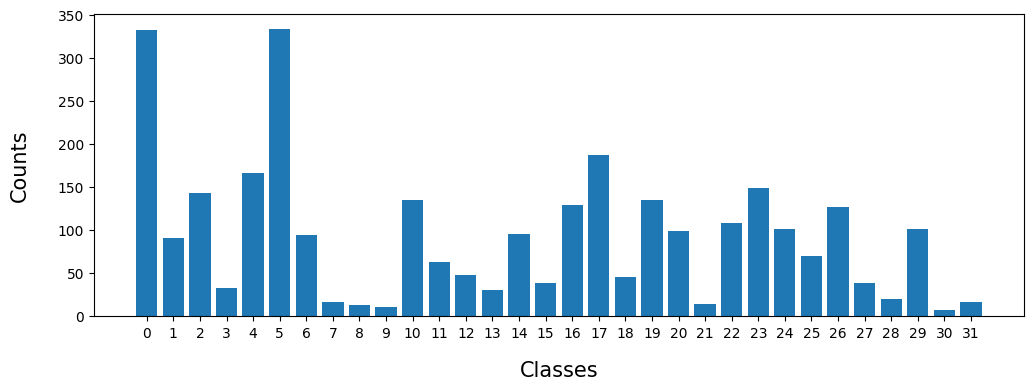

In [ ]:
df_data3k['freq'] = df_data3k.groupby('reCheckedsubject')['reCheckedsubject'].transform('count')
dict_freq_pair = getFreqPair(df_data3k, 'reCheckedsubject')
names = list(dict_freq_pair.keys())
values = list(dict_freq_pair.values())

plt.figure(figsize=(12,4),dpi=100,linewidth = 1)
plt.xlabel("Classes", fontsize=15, labelpad = 15)
plt.ylabel("Counts", fontsize=15, labelpad = 20)
plt.bar(names, values, tick_label=names)
#plt.bar(range(len(dict_freq_pair)), values, tick_label=names)
#pd.DataFrame(df_freq_pair.items()).plot.bar(figsize=(15,10))

<BarContainer object of 32 artists>

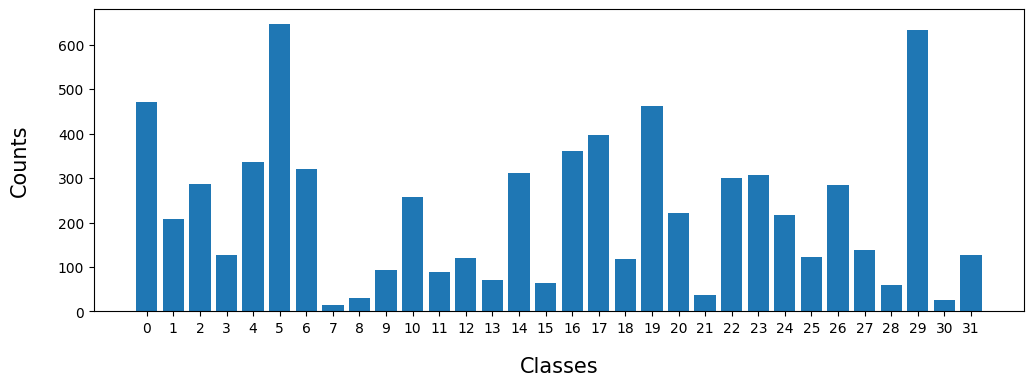

In [ ]:
df_old['freq'] = df_old.groupby('分類')['分類'].transform('count')
dict_freq_pair = getFreqPair(df_old, '分類', 'freq')
names = list(dict_freq_pair.keys())
values = list(dict_freq_pair.values())

plt.figure(figsize=(12,4),dpi=100,linewidth = 1)
plt.xlabel("Classes", fontsize=15, labelpad = 15)
plt.ylabel("Counts", fontsize=15, labelpad = 20)
plt.bar(names, values, tick_label=names)

# (optional)抽一部分資料出來測試

In [ ]:
df_test = df_old.sample(int(len(df_old)*0.1), ignore_index = True)
len(df_test)

725

# 把資料放到 df_test 中
## 前面步驟不論是抽樣還是整檔，後續都用 df_test 以達到一般化

In [ ]:
df_test = df_old

In [ ]:

#df = data.sample(frac=1).iloc[0]
x = df_test['內容']
y = df_test['分類']
len(x),len(y)

(7256, 7256)

# 載入模型

In [ ]:
from torch import nn

class OurModel(nn.Module):
  def __init__(self, ori_model, num_labels):
    super(OurModel, self).__init__()
    self.num_labels = num_labels

    self.model = model = ori_model.to(device)
    self.dropout = nn.Dropout(0.1).to(device)
    self.classifier = nn.Linear(768, num_labels).to(device)

  def forward(self, input_ids=None, attention_mask=None, labels=None):
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
    layers = self.dropout(outputs[0]).to(device)
    logits = self.classifier(layers[:, 0, :].view(-1, 768)).to(device)

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss().to(device)
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1)).to(device)
    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)


In [ ]:
import torch
from transformers.modeling_outputs import TokenClassifierOutput
from transformers import AutoModel, AutoTokenizer

## 載入pretrained model

In [ ]:
NAME = "uer/roberta-base-finetuned-jd-full-chinese"
model = OurModel(AutoModel.from_pretrained(NAME), 32).to(device)

Some weights of the model checkpoint at uer/roberta-base-finetuned-jd-full-chinese were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 載入fine-tuned layer 

In [ ]:
#checkpoint = torch.load('model/roberta-base-2020CisDep-10501-20220713.zip', map_location='cpu')
checkpoint = torch.load('model/roberta-base-2020CisDep-10501-20220713.zip', map_location= device)
model.load_state_dict(checkpoint['model_state_dict'])
tokenizer = AutoTokenizer.from_pretrained(NAME)

# 預測

## 單筆預測

In [ ]:
import random

In [ ]:
data_index = random.randint(0,len(df_test))

inputs = tokenizer(x[data_index], max_length=512, return_tensors='pt')
#logits = model(inputs['input_ids'], inputs['attention_mask'])
logits = model(inputs['input_ids'].cuda(), inputs['attention_mask'].cuda())

predition_Y = torch.argmax(logits.logits[0].cpu()).tolist()
print(f"實際標籤: {y[data_index]}")
print(f"預測標籤: {predition_Y}")

x[data_index]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


實際標籤: 24
預測標籤: 16


'校園的問題非常多，我們來講校園的毒品，其實校園毒品越來越嚴重。局長，我們一起來看一個數據，這是從96年到105年的資料，你看！連國小生都會吸毒，而且這是有通報的案例，有通報的就這麼多了，沒通報的，聽校長說還更多。為什麼？因為學校不敢通報，因為通報會影響校譽，所以通常學校不敢去通報。你看這些通報的案例都是被警方查獲的，才有這個紀錄，局長，我想請問，對於校園毒品越來越嚴重的例子，你要怎麼去防範？或者你有做哪些事情？主席（黃議員柏霖）：局長請答復。教育局王局長進焱：毒品的問題，高雄市很嚴格在執行，所以現在人數有下降，但剛剛提到國小目前沒有。我們做的方式目前有二個管道，一個是學校先觀察到、先輔導，或者有特殊的案例，我們跟警察局有秘密的管道在聯繫，警察局如果有發現學生吸毒，也會跟我們合作，會做尿液篩檢。黃議員淑美：你們只有做尿液篩檢嗎？教育局王局長進焱：當然是事先宣導讓大家知道，如果看到高危險群的孩子，我們就會做尿液篩檢，之後再做輔導。第二個，我們也鼓勵…。黃議員淑美：全部的小朋友都要做尿液篩檢嗎？教育局王局長進焱：沒有，我們只針對特定人物，放假後開學，我們看這個孩子好像眼神或什麼比較特別的。第二個，對於那些平常就中輟的學生都列入觀察，包括我們一些司機，對於校車也需要做防範。至於篩檢部分，只要學校老師認為他可能要做尿液篩檢，老師就可以建議，我們在學校…。黃議員淑美：所以是由老師來通報嗎？教育局王局長進焱：不是通報。我們不讓學校老師負責，而是讓校長來做高關懷的衡量；對的話，學校就做機制處理。所以全部都由校長來做衡量，校長跟警察局是聯繫的。這個部分還有一個方式…。黃議員淑美：你講的都是一套，但是我覺得這有困難度。你要知道這個小孩是否有吸毒，我覺得這有困難度。你說這個工作是由校長在察看，但是我覺得校長沒有辦法去看哪個孩子有這樣的問題，不可能。教育局王局長進焱：所以我剛才說整個機制是這樣，我們不要老師和行政人員觀察完以後還要來負責。觀察完以後，讓校長和行政院跟警察聯絡，這樣比較密切，才不會讓老師在看的時候很費神，用集體的力量跟警察合作才有辦法。在學校裡面，當然要宣導拒絕讓它進來。平常的校外會，教育局的軍訓室有組一個校外會，也是在外面巡視並觀察孩子的…。黃議員淑美：局長，你剛才說我們目前沒有案例，你看國中生105年就有三百多個，每年都有，哪有說今年沒有，你告訴我106年有多少個案例？

## 整批預設

In [ ]:
# list_pred_y:存放預測結果
list_pred_y = []

# d = {'col1': [1, 2], 'col2': [3, 4]}
# df = pd.DataFrame(data=d)

In [ ]:
x.index,list_pred_y,len(y)

(RangeIndex(start=0, stop=7256, step=1), [], 7256)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
import time
start = time.time()

for i in range(len(x)):
  inputs = tokenizer(x[i], max_length=512, return_tensors='pt')
  logits = model(inputs['input_ids'].cuda(), inputs['attention_mask'].cuda())
  predition_Y = torch.argmax(logits.logits[0].cpu()).tolist()
  list_pred_y.append(predition_Y)
  if len(list_pred_y) % 300 == 0:
    print(len(list_pred_y))
    print(f"實際標籤: {y[i]}")
    print(f"預測標籤: {predition_Y}")

end = time.time()
cost_time = end - start
print('predicting time', cost_time)

300
實際標籤: 14
預測標籤: 14
600
實際標籤: 3
預測標籤: 29
900
實際標籤: 28
預測標籤: 27
1200
實際標籤: 31
預測標籤: 31
1500
實際標籤: 29
預測標籤: 29
1800
實際標籤: 29
預測標籤: 29
2100
實際標籤: 22
預測標籤: 22
2400
實際標籤: 1
預測標籤: 1
2700
實際標籤: 29
預測標籤: 29
3000
實際標籤: 23
預測標籤: 23
3300
實際標籤: 19
預測標籤: 19
3600
實際標籤: 17
預測標籤: 17
3900
實際標籤: 2
預測標籤: 2
4200
實際標籤: 23
預測標籤: 23
4500
實際標籤: 13
預測標籤: 13
4800
實際標籤: 2
預測標籤: 2
5100
實際標籤: 19
預測標籤: 19
5400
實際標籤: 19
預測標籤: 22
5700
實際標籤: 6
預測標籤: 6
6000
實際標籤: 4
預測標籤: 4
6300
實際標籤: 23
預測標籤: 29
6600
實際標籤: 5
預測標籤: 5
6900
實際標籤: 14
預測標籤: 14
7200
實際標籤: 26
預測標籤: 26
predicting time 161.0533835887909


In [ ]:
result = pd.DataFrame({'content': x, 'pred_y':list_pred_y, 'true_y':y})
result.columns,result.head(3)

(Index(['content', 'pred_y', 'true_y'], dtype='object'),
                                              content  pred_y  true_y
 0  壽山動物園為增進動物飼養福祉及保育工作，特設立「高雄市壽山動物園認養辦法」設立動物認養專戶，...      20      20
 1  高雄翻轉須新政府全面力挺高雄市長陳菊日前在市議會做施政報告時指出，翻轉產業高雄的使命責任，面...      10      10
 2  台塑企業回饋地方藝文活動，週六晚間在高雄市仁武區運動公園登場，明華園歌仔戲團演出逐鹿中原戲碼...       1       1)

In [ ]:
result.shape

(7256, 3)

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_score(y_true, y_pred)
acc_score =  accuracy_score(result['true_y'], result['pred_y'])
acc_score

0.9240628445424476

# (optional)只輸出預測錯誤的資料

In [ ]:
print(len(result))
result = result[result['pred_y'] != result['true_y']]
print(len(result))

725
221


# 將結果存到 /result

In [ ]:
import numpy as np
acc_score = np.round(acc_score*100,2)
acc_score

92.41

In [ ]:
result.to_csv(f'result/roberta-base-TrainByOld-PredOld-acc{acc_score}-20220713.csv')

# 檢查混淆矩陣

https://medium.com/analytics-vidhya/multi-class-ml-models-evaluation-103c9fdadb41

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#labels = list(test_df['classes'].unique()) 
labels = list(y.unique())
print(classification_report(y, list_pred_y)) #classification report from sklearn
cnf_matrix = confusion_matrix(y, list_pred_y, labels=labels)


              precision    recall  f1-score   support

           0       0.96      0.86      0.90       472
           1       0.92      0.97      0.94       207
           2       0.96      0.97      0.97       286
           3       0.92      0.97      0.95       126
           4       0.92      0.87      0.90       337
           5       0.93      0.93      0.93       647
           6       0.94      0.88      0.91       320
           7       1.00      1.00      1.00        15
           8       0.97      0.97      0.97        31
           9       0.95      0.93      0.94        94
          10       0.94      0.79      0.86       258
          11       0.93      0.94      0.94        88
          12       0.87      1.00      0.93       120
          13       0.85      1.00      0.92        70
          14       0.97      0.91      0.94       311
          15       0.85      0.87      0.86        63
          16       0.88      0.97      0.92       361
          17       0.81    

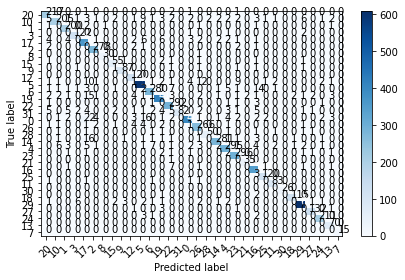

In [ ]:

plt.imshow(cnf_matrix, cmap=plt.cm.Blues, interpolation='nearest', aspect='auto') #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

# 如有存predict,true資料，可從檔案讀出資料計算accuracy

In [ ]:
path_all = 'result/roberta-base-TrainByOld-PredOld-acc92.41-20220713.csv'
df_all_acc = pd.read_csv(path,index_col=0)
df_all_acc.head(3)

,content,pred_y,true_y
0,壽山動物園為增進動物飼養福祉及保育工作，特設立「高雄市壽山動物園認養辦法」設立動物認養專戶，...,20,20
1,高雄翻轉須新政府全面力挺高雄市長陳菊日前在市議會做施政報告時指出，翻轉產業高雄的使命責任，面...,10,10
2,台塑企業回饋地方藝文活動，週六晚間在高雄市仁武區運動公園登場，明華園歌仔戲團演出逐鹿中原戲碼...,1,1


In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_true, y_pred)
acc_score =  accuracy_score(df_all_acc['true_y'], df_all_acc['pred_y'])
acc_score

0.9240628445424476

In [ ]:
path_test = 'tmp/test_2022071301.csv'
df_test_acc = pd.read_csv(path_test)

In [ ]:
#df_test_acc.reset_index(inplace = True)
len(df_test_acc),df_test_acc.head()

(725,    Unnamed: 0    編號  類別  分類  \
 0        3736  3737  新聞  29   
 1        3440  3441  新聞   0   
 2         693   694  新聞  29   
 3         575   576  新聞   4   
 4        5655  5656  市總   0   
 
                                                   內容  舊分類  freq  
 0  各說各話被點名跑票的民進黨台南市議員陳朝來昨率十多位支持者舉行記者會，宣布退出民進黨，他除重...   28   632  
 1  市長宣布投入一億餘元施作明年完工林園區為海洋濕地公園催生，市長陳菊昨天宣示投入一億餘元啟動該...   14   472  
 2  國民黨徵召高雄市第二選區立委參選人黃韻涵，走訪彌陀基層，她主打在地牌爭取支持。國民黨高雄市黨...    6   632  
 3  鵝鑾鼻保安宮福德正神前晚舉辦晚會，鎮長盧玉棟奉獻六百粒紅蛋、信徒捐獻六百粒壽桃慶生，主委葉啟...   52   337  
 4  接下來是鳳山水庫旁的道路，本來是規劃25米寬的道路，本席建議只要規劃12米就好了。因為25米...   14   472  )

In [ ]:
x = df_test_acc['內容']
y = df_test_acc['分類']

In [ ]:
list_pred_y = []
start = time.time()

for i in range(len(x)):
  inputs = tokenizer(x[i], max_length=512, return_tensors='pt')
  logits = model(inputs['input_ids'], inputs['attention_mask'])
  predition_Y = torch.argmax(logits.logits[0].cpu()).tolist()
  list_pred_y.append(predition_Y)
  if len(list_pred_y) % 300 == 0:
    print(len(list_pred_y))
    print(f"實際標籤: {y[i]}")
    print(f"預測標籤: {predition_Y}")

end = time.time()
cost_time = end - start
print('predicting time', cost_time)

300
實際標籤: 29
預測標籤: 29
600
實際標籤: 10
預測標籤: 19
predicting time 765.2642993927002


In [ ]:
result = pd.DataFrame({'content': x, 'pred_y':list_pred_y, 'true_y':y})
result.columns,result.head(3)

(Index(['content', 'pred_y', 'true_y'], dtype='object'),
                                              content  pred_y  true_y
 0  各說各話被點名跑票的民進黨台南市議員陳朝來昨率十多位支持者舉行記者會，宣布退出民進黨，他除重...      29      29
 1  市長宣布投入一億餘元施作明年完工林園區為海洋濕地公園催生，市長陳菊昨天宣示投入一億餘元啟動該...      12       0
 2  國民黨徵召高雄市第二選區立委參選人黃韻涵，走訪彌陀基層，她主打在地牌爭取支持。國民黨高雄市黨...      29      29)

In [ ]:
acc_score_test_set =  accuracy_score(result['true_y'], result['pred_y'])
acc_score_test_set

0.7613793103448275

In [ ]:
#labels = list(test_df['classes'].unique()) 
labels = list(y.unique())
print(classification_report(y, list_pred_y, zero_division = 0)) #classification report from sklearn
#cnf_matrix = confusion_matrix(y, list_pred_y, labels=labels)

              precision    recall  f1-score   support

           0       0.88      0.57      0.69        63
           1       0.75      0.82      0.78        11
           2       0.82      0.93      0.87        30
           3       0.40      1.00      0.57         2
           4       0.82      0.59      0.69        39
           5       0.86      0.84      0.85       123
           6       0.65      0.52      0.58        33
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.38      0.17      0.23        18
          11       0.33      1.00      0.50         1
          12       0.56      1.00      0.71         5
          13       0.40      1.00      0.57         2
          14       0.90      0.79      0.84        34
          15       0.00      0.00      0.00         0
          16       0.76      0.93      0.83        40
          17       0.56      0.74      0.64        42
          18       0.20    

# classification_report 可轉成DataFrame方便輸出

In [ ]:
report = classification_report(y, list_pred_y, output_dict= True, zero_division = 0)
df_class_report = pd.DataFrame(report).transpose()
np.round(df_class_report, 2)